In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
import umap

from scipy.interpolate import interp1d
from scipy.signal import lfilter

umap_reducer = umap.UMAP()
pca_reducer = PCA(n_components=2)

In [2]:
poli_aff_monthly_emb_changes = np.load("./t5-small_wmt_lm_monthly_embedding_correlations.npy", allow_pickle=True).item()
print(poli_aff_monthly_emb_changes.keys())
emb_idx_to_token = poli_aff_monthly_emb_changes["emb_idx_to_token"]

poli_aff_model_emb_correlation_avgs = poli_aff_monthly_emb_changes["model_correlation_avgs"]
poli_aff_model_emb_max_corrs = poli_aff_monthly_emb_changes["model_max_correlations"]
poli_aff_model_emb_max_corr_dists = poli_aff_monthly_emb_changes["model_max_correlation_dists"]
poli_aff_vec_emb_correlation_avgs = poli_aff_monthly_emb_changes["vec_correlation_avgs"]
poli_aff_vec_emb_max_corrs = poli_aff_monthly_emb_changes["vec_max_correlations"]
poli_aff_vec_emb_max_corr_dists = poli_aff_monthly_emb_changes["vec_max_correlation_dists"]

dict_keys(['model_correlation_matrices', 'vec_correlation_matrices', 'model_correlation_avgs', 'vec_correlation_avgs', 'model_max_correlations', 'vec_max_correlations', 'model_max_correlation_dists', 'vec_max_correlation_dists', 'emb_idx_to_token'])


In [3]:
vocab_size = len(list(emb_idx_to_token.keys()))

model_linearity_sorted_idxs = np.argsort(poli_aff_model_emb_correlation_avgs[:vocab_size])
vec_linearity_sorted_idxs = np.argsort(poli_aff_vec_emb_correlation_avgs[:vocab_size])

model_most_linear_tokens = [(idx, emb_idx_to_token[idx]) for idx in model_linearity_sorted_idxs[::-1][:100]]
model_least_linear_tokens = [(idx, emb_idx_to_token[idx]) for idx in model_linearity_sorted_idxs[:100]]
vec_most_linear_tokens = [(idx, emb_idx_to_token[idx]) for idx in vec_linearity_sorted_idxs[::-1][:100]]
vec_least_linear_tokens = [(idx, emb_idx_to_token[idx]) for idx in vec_linearity_sorted_idxs[:100]]

print(np.nanmean(poli_aff_vec_emb_correlation_avgs[vec_linearity_sorted_idxs[:1000]]))

print(model_most_linear_tokens)
print(vec_most_linear_tokens)
print(model_least_linear_tokens)
print(vec_least_linear_tokens)

0.11893414366925474
[(32018, '<extra_id_81>'), (32042, '<extra_id_57>'), (32032, '<extra_id_67>'), (32033, '<extra_id_66>'), (32034, '<extra_id_65>'), (32036, '<extra_id_63>'), (32037, '<extra_id_62>'), (32038, '<extra_id_61>'), (32039, '<extra_id_60>'), (32041, '<extra_id_58>'), (32043, '<extra_id_56>'), (32026, '<extra_id_73>'), (32044, '<extra_id_55>'), (32045, '<extra_id_54>'), (32046, '<extra_id_53>'), (32047, '<extra_id_52>'), (32048, '<extra_id_51>'), (32049, '<extra_id_50>'), (32050, '<extra_id_49>'), (32051, '<extra_id_48>'), (32028, '<extra_id_71>'), (32025, '<extra_id_74>'), (32054, '<extra_id_45>'), (32008, '<extra_id_91>'), (6385, '▁Its'), (32000, '<extra_id_99>'), (32001, '<extra_id_98>'), (32002, '<extra_id_97>'), (32003, '<extra_id_96>'), (32004, '<extra_id_95>'), (32005, '<extra_id_94>'), (32007, '<extra_id_92>'), (32010, '<extra_id_89>'), (32024, '<extra_id_75>'), (32012, '<extra_id_87>'), (32013, '<extra_id_86>'), (32014, '<extra_id_85>'), (32015, '<extra_id_84>'), (

In [31]:
model_cond_idxs = (poli_aff_model_emb_max_corr_dists > 12) & (poli_aff_model_emb_correlation_avgs < 0.992) #& (poli_aff_vec_emb_max_corrs < 0.99)
model_highest_cond_emb_corrs = poli_aff_model_emb_correlation_avgs[model_cond_idxs]
model_closest_cycle_idxs = np.argsort(model_highest_cond_emb_corrs)

#model_closest_cycle_idxs = np.sort(model_closest_cycle_idxs)[::-1]

#token_to_embed_idx = {v: k for k, v in emb_idx_to_token.items()}
#print(token_to_embed_idx[""])


print(len(model_closest_cycle_idxs))
print([(idx, emb_idx_to_token[idx]) for idx in model_closest_cycle_idxs[:100]])

12012
[(962, '▁issue'), (1553, '▁began'), (2317, 'ible'), (8229, '▁ALL'), (543, '▁page'), (467, '▁game'), (1664, '▁sometimes'), (436, '▁sind'), (9419, 'heure'), (551, '▁wird'), (536, '1'), (890, '▁Ein'), (508, '▁large'), (11429, '▁Break'), (3193, '▁agency'), (2442, '▁www'), (114, '▁like'), (2315, '▁states'), (1663, '▁wish'), (3150, '▁previously'), (1466, '▁piece'), (635, 'mm'), (59, '▁not'), (10004, '▁calories'), (3707, '48'), (417, '▁sure'), (477, '▁days'), (707, '▁Dr'), (43, '▁have'), (3056, '▁names'), (9114, '▁virtually'), (292, '▁Sie'), (9886, 'coding'), (6629, '▁pus'), (17, 't'), (5945, '▁Gen'), (6337, '▁warning'), (2125, '▁Association'), (4087, 'ür'), (7480, 'valu'), (4415, 'such'), (554, '▁pre'), (8359, '▁visa'), (3189, '▁faut'), (830, '▁bring'), (808, '▁took'), (6975, 'gegeben'), (6925, '▁Estate'), (7775, 'round'), (8344, '▁participant'), (4055, 'rid'), (5048, '▁dort'), (1756, '▁activity'), (6273, '▁ref'), (3531, '▁respond'), (3553, '▁regard'), (7170, 'même'), (4840, '▁imp'), (

In [2]:
poli_aff_monthly_vec_embeddings = np.load("./t5-small_wmt_lm_monthly_vec_embeddings.npy")

/tmp/ipykernel_2934575/4287767605.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('cividis', len(token_month_proj))


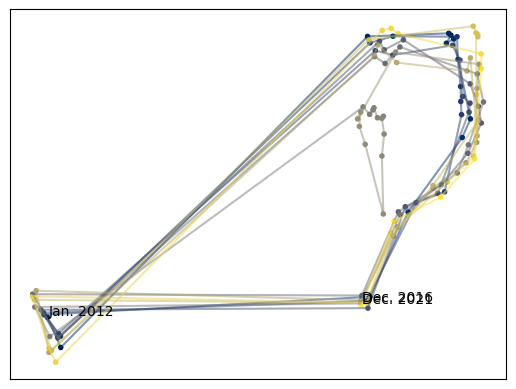

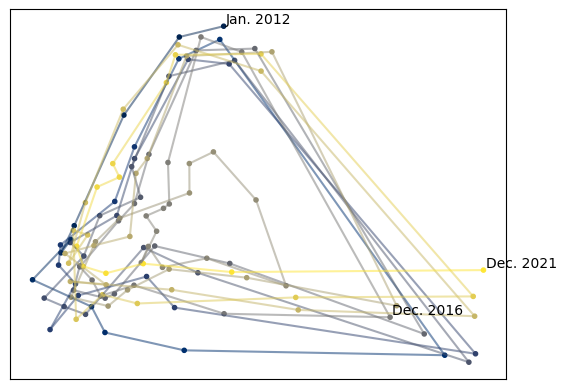

: 

In [17]:
token_idx = 1882 #20587 Emmanuel #1421 _2016 #28868 Romney #1718 _July #3499 Primary #_November 1671 #452 _public #30684 spans
token_monthly_embs = poli_aff_monthly_vec_embeddings[:, token_idx, :]
token_month_umap_proj = umap_reducer.fit_transform(token_monthly_embs)
token_month_pca_proj = pca_reducer.fit_transform(token_monthly_embs)

cmap = matplotlib.cm.get_cmap('cividis', len(token_month_proj))
#cmap = sns.dark_palette("seagreen", reverse=True, as_cmap=True, n_colors=len(token_month_proj))
#cmap = sns.cubehelix_palette(as_cmap=True, n_colors=len(token_month_proj))
#ax = plt.axes()
#ax.set_facecolor((0.1, 0.1, 0.1, 0.05))

for token_month_proj in [token_month_umap_proj, token_month_pca_proj]:
    plt.scatter(token_month_proj[:, 0], token_month_proj[:, 1], s=9, c=list(range(len(token_month_proj))), cmap=cmap, alpha=1.0)
    for j in range(len(token_month_proj) - 1):
        plt.plot(token_month_proj[j:j+2, 0], token_month_proj[j:j+2, 1], '-', c=cmap(j), alpha=0.5)

    plt.annotate("Jan. 2012", (token_month_proj[0][0] + 0.04, token_month_proj[0][1] + 0.04), fontsize=10)
    plt.annotate("Dec. 2016", (token_month_proj[57][0] + 0.04, token_month_proj[57][1] + 0.04), fontsize=10)
    plt.annotate("Dec. 2021", (token_month_proj[-1][0] + 0.04, token_month_proj[-1][1] + 0.04), fontsize=10)
    plt.xticks([])
    plt.yticks([])
    plt.show()